# LIBRARIES
* Execute this cell before going any further. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<br/><br/>

# Warmup

## DataFrames and Tabular Data  
`10 points`

Much of scientific data is naturally **tabular**: rows represent observations, and columns represent variables. In Python, the `pandas` library provides the `DataFrame` object for working with this kind of data efficiently.

In this warm-up, you will construct a simple `DataFrame`, inspect its structure, and perform a basic column-wise operation. The goal is to understand how pandas represents and manipulates tabular data.

### CODE

Construct a pandas `DataFrame` that represents the given data.

Your DataFrame must:
- Contain one row per student  
- Contain one column for each recorded quantity  
- Use clear, descriptive column labels  

Once your DataFrame is created:
- Display it as the final line of a code cell  
- Create a new column equal to five times one of the existing numerical columns  
- Display the updated DataFrame  

Do not overwrite the original data when creating the new column.

In [2]:
students    = ['Bob', 'Alice', 'Giancarlo']
test_scores = [95, 85, 75]
gpa         = [3.0, 2.0, 5.0]

# Create a DataFrame that represents this data.
# Use clear, meaningful column labels.
# Display the DataFrame as the final line of this cell.

df = pd.DataFrame({
    "students": students,
    "test scores": test_scores,
    "GPA": gpa
})

### Multiple Choice Question

1. Suppose one entry in your numerical column were missing (`NaN`).  
What would pandas do when computing the new scaled column?

A. Raise an error  
B. Skip the row entirely  
C. Propagate the missing value  
D. Replace it with zero  

Explain your choice.

### ANSWER

C

In pandas, arithmetic operations are performed elementwise and follow NA-propagation rules. If a value in a numerical column is missing (NaN), any arithmetic operation involving that value (such as multiplying the column by a constant) will also produce NaN in the corresponding entry of the new column. Pandas does not raise an error, skip the row, or automatically replace missing values unless explicitly instructed (e.g., via fillna).

### Column Operations

Using your DataFrame:

• Multiply the GPA column by 5  
• Store the result in a new column
• Display the updated DataFrame

In [3]:
# Add a new column based on an existing column.
# Do not overwrite the original GPA column.
df['scaled GPA'] = df["GPA"] * 5.0

### Multiple Choice Question

2. Which statement best describes what happens when you multiply a DataFrame column by a number?

A. The operation is applied element-by-element  
B. Only the first value is modified  
C. The column must be looped over manually  
D. The DataFrame is converted to a list  

Explain your reasoning.


3. If you run `df["GPA"] * 5`, the result is:

A. A Python list  
B. A NumPy array  
C. A pandas Series  
D. A new DataFrame  

Explain your choice.

### ANSWERS

2. A. In pandas, columns are represented as `Series` objects, which support vectorized operations. When you multiply a column by a scalar, pandas applies the operation independently to each element in the column without requiring an explicit loop. This is one of the reasons pandas operations are both concise and efficient.

3. B. The expression `df["GPA"]` returns a pandas Series. Multiplying it by a scalar preserves its type, producing a new Series with the same index but scaled values. The result is not a list or a NumPy array, and it is not a DataFrame unless explicitly constructed as one.

### Short Answer Response

Does multiplying the GPA by 5 change:

• The number of rows?  
• The number of columns?  

Explain why or why not.

### ANSWERS

Multiplying a column by a scalar is an element-wise operation that transforms the values in that column but does not alter the structure of the DataFrame. The number of rows is determined by the index, and the number of columns is determined by the set of column labels, both remain unchanged unless rows or columns are explicitly added or removed.

<br/><br/>
<br/><br/>

# The Photoelectric Effect

# The Photoelectric Effect

In this activity, you will analyze photoelectric spectra to determine how the energy delivered by incident light is partitioned between the kinetic energy of emitted electrons and the energy required to remove an electron from a metal surface.

The experiment consists of two electrodes in a vacuum circuit. When the cathode is illuminated, electrons may be emitted and collected at the anode, producing a measurable current. By varying the applied voltage between the electrodes, the kinetic energy of the emitted electrons can be inferred from the observed current–voltage behavior.

## PART 1 — Identifying the Stopping Potential in Photoelectric Spectra
`20 points`

An applied voltage can be used to oppose the motion of photoemitted electrons. As this **stopping potential** $V_s$ is increased, the measured photocurrent decreases; when the current is reduced to approximately zero, no electrons reach the anode. The stopping potential is therefore related to the maximum kinetic energy of the emitted electrons by
$$
K_{\max} = eV_s,
$$
where $e$ is the elementary charge.

In this section, you will visualize photoelectric spectra (photocurrent as a function of applied voltage) and identify the experimental signature of the stopping potential in the data.

### CODE (Data + Plot)

For **one** spectrum file:

- Load the CSV into a DataFrame named `data` using `pd.read_csv(...)`.
- Verify that the DataFrame contains the expected columns (show `data.head()`).
- Produce a scatter or line plot of **current vs voltage** using columns from `data`.
- Label axes with units, add a title, and include a grid.
- From the plot, identify the voltage at which the photocurrent approaches zero.

> Do not hard-code column arrays; reference columns as `data["column_name"]`.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# If the file is in a different folder than this notebook, use "folder/filename.csv"
data = pd.read_csv("./data/Ca_200nm.csv")

data.head()

,Trial,Metal,Voltage (V),Current (pA),Frequency (Hz),Wavelength (nm),Unnamed: 6
0,1,Calcium,0.001,8.02,1.500000e+15,200.0,NaN
1,2,Calcium,0.251,7.40,1.500000e+15,200.0,NaN
2,3,Calcium,0.498,6.80,1.500000e+15,200.0,NaN
3,4,Calcium,0.751,6.20,1.500000e+15,200.0,NaN
4,5,Calcium,0.998,5.60,1.500000e+15,200.0,NaN


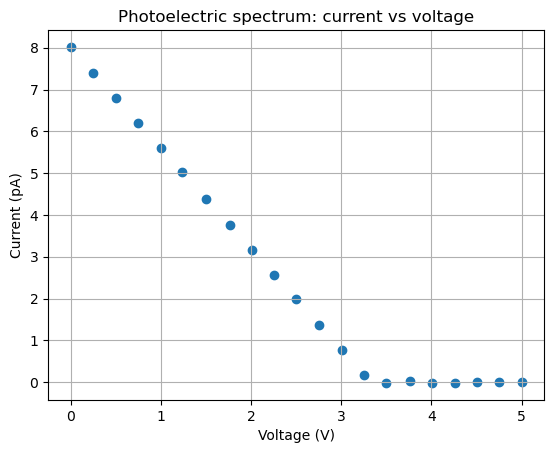

In [5]:
# Replace the column names below with the ones in your CSV
xcol = "Voltage (V)"
ycol = "Current (pA)"

plt.figure()
plt.scatter(data[xcol], data[ycol])
plt.xlabel(f"{xcol}")
plt.ylabel(f"{ycol}")
plt.title("Photoelectric spectrum: current vs voltage")
plt.grid(True)
plt.show()

### SHORT RESPONSE QUESTIONS

1. List the column names in `data` and briefly state the physical quantity and units represented by each.

2. What does a single row in the dataset correspond to experimentally? Why is it reasonable to treat each row as an independent measurement?

3. Describe the behavior of the photocurrent as the applied voltage increases. Identify the voltage range over which the current rapidly decreases and explain its physical significance.

4. From your plot, estimate the stopping potential $V_s$. Using
$$
K_{\max} = eV_s,
$$
report the corresponding maximum kinetic energy in electronvolts.

### ANSWER


1. 	Trial	Metal	Voltage (V)	Current (pA)	Frequency (Hz)	Wavelength (nm)\

2. Each row represents data gathered when performing the experiment at a given potential for a fixed light wavelength and metal. It is reasonable to treat each row as an independent measurement because each data point is obtained at a distinct voltage setting of the apparatus.

3. As the applied voltage becomes more positive in opposition to the emitted electrons, the photocurrent decreases because fewer photoelectrons have sufficient kinetic energy to reach the collecting electrode. At low opposing voltages, most emitted electrons contribute to the current, so the current remains relatively large. As the voltage is increased, electrons with lower kinetic energies are progressively prevented from reaching the anode. **Values of ranges will depend on what wavelenght is selected**

4. From the plot, the stopping potential $V_s$ can be estimated as the x-intercept of the current–voltage curve, where the photocurrent goes to approximately zero. For example, in one spectrum the intercept occurs near $V_s \approx 3.5\ \text{V}$; however, this value will depend on the wavelength of light used in the selected dataset. Using
$$
K_{\max} = eV_s,
$$
the corresponding maximum kinetic energy is numerically equal to the stopping potential when expressed in electronvolts. Thus, for $V_s \approx 3.5\ \text{V}$, the maximum kinetic energy is $K_{\max} \approx 3.5\ \text{eV}$.


### Multiple Choice Question

If the light intensity increases but the frequency is unchanged (and still above threshold), the stopping potential $V_s$ is expected to:

A. Increase  
B. Decrease  
C. Remain approximately unchanged  
D. Become undefined  

Explain briefly using the meaning of $V_s$.

### ANSWERS

The stopping potential $V_s$ measures the maximum kinetic energy of the emitted electrons. For a fixed light frequency above the threshold, the photon energy is unchanged, so the maximum kinetic energy of the photoelectrons remains the same. Increasing the light intensity increases the number of emitted electrons (and thus the photocurrent), but it does not change the energy carried by each photon. As a result, the stopping potential remains approximately unchanged.

<br/><br/>
<br/><br/>

## PART 2 — Processing the Spectrum
`20 points`

In this section, you will extract the **stopping potential** $V_s$ from each spectrum using a reproducible numerical procedure. This value determines the maximum kinetic energy of the emitted electrons,
$$
K_{\max} = eV_s,
$$
or equivalently (in electronvolts),
$$
K_{\max} = V_s.
$$

Because this analysis must be applied to multiple spectra, your approach should be systematic and reusable.

For this task, spectrum processing will involve three operations:

1. **Filtering** — isolating the portion of the spectrum relevant for analysis.  
2. **Column operations** — transforming or deriving quantities as needed.  
3. **Reduction** — extracting a single physically meaningful value from the data (here, $V_s$).

You will determine the stopping potential by performing a **linear regression** on the nonzero region of the current–voltage curve and computing the x-intercept of the fitted line.

### CODE

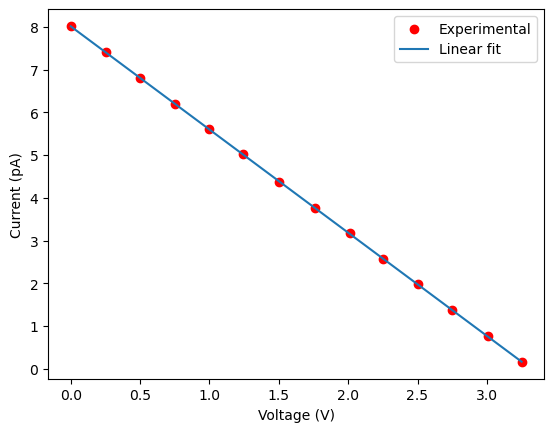

Cutoff Voltage: 3.318


In [6]:
# Starting from the DataFrame `data` created in PART 1:

# 1. Filter the data to isolate the nonzero-current region used for fitting.
#    Your threshold choice should be physically motivated. Note that due to 
#    fluctiations in the data, we have to find where current hits zero and 
#    discard any points beyond that.

cutoff_idx = data.index[data["Current (pA)"] <= 0][0]
data_filtered = data.loc[:cutoff_idx - 1]

# 2. Perform a linear fit of current vs voltage using np.polyfit(..., degree=1).

slope, intercept = np.polyfit(data_filtered["Voltage (V)"], data_filtered["Current (pA)"], 1)

# 3. Plot the filtered data and the resulting regression line on the same axes.

plt.scatter(data_filtered['Voltage (V)'], data_filtered['Current (pA)'], color = 'r', label = 'Experimental')

plt.ylabel('Current (pA)')
plt.xlabel('Voltage (V)')

x_trendline = np.linspace(0, max(data_filtered['Voltage (V)']), 200)
y_trendline = slope * x_trendline + intercept

plt.plot(x_trendline, y_trendline, label="Linear Fit")
plt.legend()
plt.show()

# 4. Compute the x-intercept of the fitted line using np.roots(...)
#    and identify this value as the stopping potential V_s.

#np.roots gives the roots (where y == 0) of a polynomial.
#It will return a list of values, but for a linear equation there is only one root.
#we can access this first element using list_of_roots[0].

roots = np.roots([slope, intercept])
cutoff_voltage = roots[0]

print(f"Cutoff Voltage: {cutoff_voltage:.3f}")

### SHORT RESPONSE QUESTIONS

1. Explain why data points near zero current should be excluded when performing a linear regression to determine $V_s$.

2. Report the stopping potential obtained from your fit. How does this value compare to your visual estimate from PART 1?

3. If this analysis were repeated using light of a longer wavelength, how would you expect $V_s$ to change? Justify your answer physically.

### ANSWERS

### ANSWERS

1. Data points near zero current are dominated by experimental noise and fluctuations, which makes their voltages poor indicators of the underlying linear trend. Including these points can bias the linear regression and lead to an inaccurate estimate of the x-intercept. Excluding them ensures that the fit reflects the region where the current–voltage relationship is approximately linear and physically meaningful.

2. The stopping potential obtained from the linear fit is consistent with the visual estimate from PART 1, though it is typically more precise. While the visual estimate relies on identifying where the plotted data appear to cross zero, the regression-based value uses all relevant data points in the linear region and therefore reduces subjective uncertainty.

3. Using light of a longer wavelength corresponds to a lower photon frequency and therefore lower photon energy. As a result, the maximum kinetic energy of the emitted electrons decreases, and the stopping potential $V_s$ is expected to decrease. If the wavelength is increased beyond the threshold value, photoemission would no longer occur and $V_s$ would be zero.


<br/><br/>
<br/><br/>
  

## PART 3 — Automating the Analysis
`20 points`

To determine how electron kinetic energy depends on the frequency of incident light, the analysis developed in PART 2 must be applied consistently across multiple spectra. Rather than repeating the same operations manually, you will encapsulate the procedure in reusable functions.

In this section, you will implement a function that processes a single spectrum and returns the physically relevant quantities. This function will then serve as a building block for analyzing an entire collection of spectra in a systematic way.


<br/><br/>

### 3a - Processing one spectrum
`10 points`  

### CODE
Write a function `process_spectrum(filename, plot)` that performs the following tasks:

- Loads the spectrum from `filename`
- Extracts the wavelength and frequency associated with the spectrum
- Determines the stopping potential $V_s$ using the regression procedure developed in PART 2
- If `plot = True' produces a plot of the spectrum with the fitted regression line (title each plot with the wavelength)

The function must return, **in this order**:
<div style="text-align: center;">
wavelength_nm, frequency_Hz, V_s
</div>

Test your function on several spectra corresponding to different wavelengths. Use spectra obtained from the same metal.

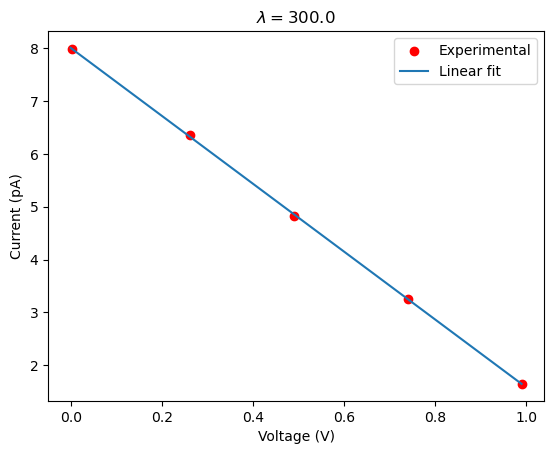

300.0, 1000000000000000.0, 1.2461300150972767


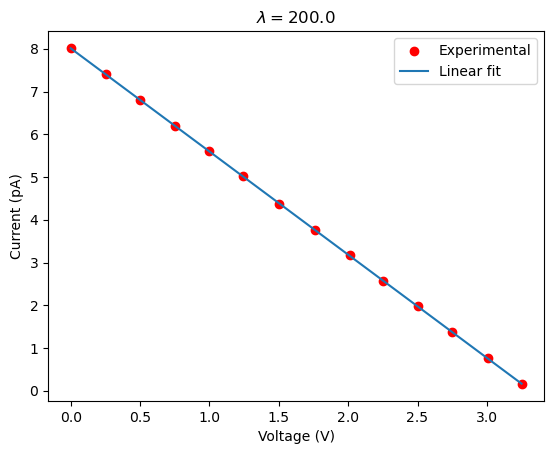

200.0, 1500000000000000.0, 3.318383786360595


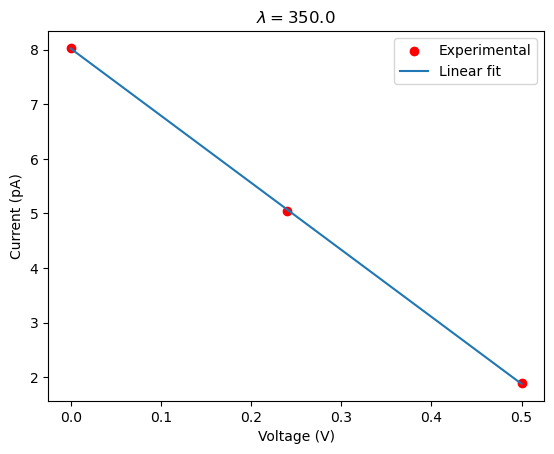

350.0, 857140000000000.0, 0.6530763219588432


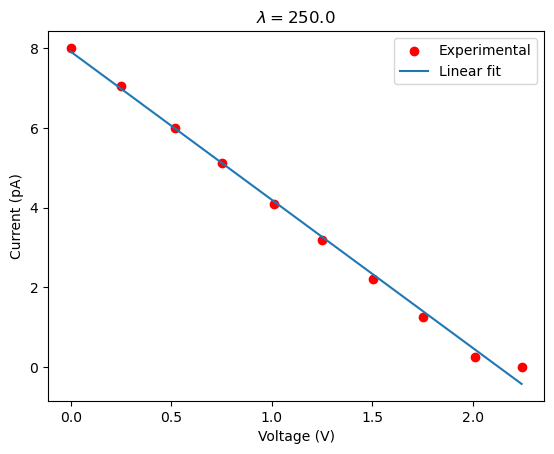

250.0, 1200000000000000.0, 2.1275089831671647


In [7]:
# Define process_spectrum(filename) here
def process_spectrum(filename, plot = True):

    # load file
    df = pd.read_csv(filename)
    cutoff_idx = df.index[df["Current (pA)"] <= 0][0]
    data_filtered = df.loc[:cutoff_idx - 1]

    # extract wavelength and frequency
    wavelength_nm = df['Wavelength (nm)'][0]
    frequency_Hz = df['Frequency (Hz)'][0]

    # stopping potential
    slope, intercept = np.polyfit(data_filtered["Voltage (V)"], data_filtered["Current (pA)"], 1)
    
    roots = np.roots([slope, intercept])
    V_s = roots[0]

    if plot == True:
        # plot 
        plt.scatter(data_filtered['Voltage (V)'], data_filtered['Current (pA)'], color = 'r', label = 'Experimental')
        
        x_trendline = np.linspace(0, max(data_filtered['Voltage (V)']), 200)
        y_trendline = slope * x_trendline + intercept
    
        plt.title(r'$\lambda =$' + f'{wavelength_nm}')
        plt.ylabel('Current (pA)')
        plt.xlabel('Voltage (V)')
        
        plt.plot(x_trendline, y_trendline, label="Linear Fit")
        plt.legend()
        plt.show()

    return wavelength_nm, frequency_Hz, V_s

# Test your function on multiple spectrum files
import os
for file in os.listdir('./data'):
    if file.endswith('.csv'):
        wavelength_nm, frequency_Hz, V_s = process_spectrum('./data/' + file)
        print(f"{wavelength_nm}, {frequency_Hz}, {V_s}")

### SHORT RESPONSE

Briefly explain why returning numerical values from `process_spectrum` is preferable to computing them only inside a plotting routine.

### ANSWER

Returning numerical values from process_spectrum separates data analysis from visualization, making the results reusable and reproducible. Numerical outputs can be stored, compared across datasets, and used in further calculations (such as plotting $V_s$ versus frequency), whereas values computed only inside a plotting routine are difficult to access programmatically and encourage duplication of work.

<br/><br/>

### 3b — Scaling Up the Analysis
`10 points`

In this section, you will apply your single-spectrum analysis routine to an entire collection of spectra and aggregate the results into a single table. The logic for iterating over files and assembling the results has been implemented for you in a helper function.

Rather than modifying this function, you will treat it as a black box and focus on using its output to analyze physical trends across multiple wavelengths.


### CODE

In [8]:
from helper import process_all_data

Run `process_all_data` on your spectra folder (ensure that the folder contains only
CSV files corresponding to this assignment). Store the result in a variable and
display the resulting DataFrame by placing the variable on the final line of a code cell.


In [9]:
# Example (modify the folder path as needed):
results = process_all_data("./data", process_spectrum)
results

,Wavelength (nm),Frequency (Hz),Stopping Potential (eV)
0,300.0,1.000000e+15,1.246130
1,200.0,1.500000e+15,3.318384
2,350.0,8.571400e+14,0.653076
3,250.0,1.200000e+15,2.127509


### SHORT RESPONSE QUESTIONS

1. Why is it advantageous to automate the analysis across all spectra rather than processing each spectrum individually?

2. Describe the trend you observe in the stopping potential as the wavelength of the incident light changes.

3. Explain how this trend supports or contradicts the classical wave description of light.

### ANSWER

### ANSWER

1. Automating the analysis ensures that the same procedure is applied consistently to every spectrum, reducing human error and improving reproducibility. It also allows the analysis to scale efficiently to many datasets and makes it straightforward to update or refine the method without repeating manual work.

2. As the wavelength of the incident light increases, the stopping potential decreases. Shorter wavelengths (higher frequencies) produce larger stopping potentials, while longer wavelengths produce smaller stopping potentials, eventually reaching zero at the threshold wavelength.

3. This trend contradicts the classical wave description of light, which predicts that increasing light intensity, not frequency, should increase the energy delivered to electrons. The observed dependence of stopping potential on frequency instead supports a particle-based description, in which the energy of each photon is proportional to its frequency.


<br/><br/>
<br/><br/>

## PART 4 — Light Energy Versus Frequency
`20 points`

If light delivers energy to electrons in discrete packets, the energy carried by a single photon is
$$
E_{\text{photon}} = h\nu,
$$
where $h$ is Planck’s constant and $\nu$ is the frequency of the incident light.

When a photon ejects an electron from the metal, this energy is partitioned between two contributions:
1. the energy required to remove the electron from the metal surface, and  
2. the kinetic energy carried away by the emitted electron.

We denote the energy required to escape the metal by the **work function** $\phi$. Energy conservation then gives
$$
h\nu = K_{\max} + \phi,
$$
where $K_{\max}$ is the maximum kinetic energy of the emitted electrons.

In the photoelectric experiment, the stopping potential $V_s$ is defined as the applied voltage required to reduce the photocurrent to zero. At this voltage, even the most energetic electrons are just prevented from reaching the collecting electrode, so their kinetic energy satisfies
$$
K_{\max} = eV_s,
$$
where $e$ is the elementary charge.

Substituting into the energy balance yields
$$
eV_s = h\nu - \phi. \tag{1}
$$

Solving for the stopping potential,
$$
V_s = \frac{h}{e}\,\nu - \frac{\phi}{e}. \tag{2}
$$

This expression predicts that a plot of stopping potential $V_s$ versus frequency $\nu$ should be linear. The **slope** of the line, $h/e$, reflects how photon energy depends on frequency, while the **y-intercept**, $-\phi/e$, encodes the work function of the metal. Physically, the intercept represents the portion of the photon energy that is always “used up” in liberating the electron before any kinetic energy remains.

You will use your experimental data to test this linear relationship, extract numerical values for $h$ and $\phi$, and compare them to accepted values.

Note that our measument is in eV, should we use equation 1 or 2?

### CODE

Using the DataFrame produced in PART 3:

- Perform a linear regression of stopping potential $V_s$ versus frequency (in Hz).
- Plot the data along with the fitted regression line.
- Extract the slope and intercept of the fit.
- Convert the slope from $\text{eV}\cdot\text{s}$ to $\text{J}\cdot\text{s}$.
- Determine the work function of the metal from the intercept.

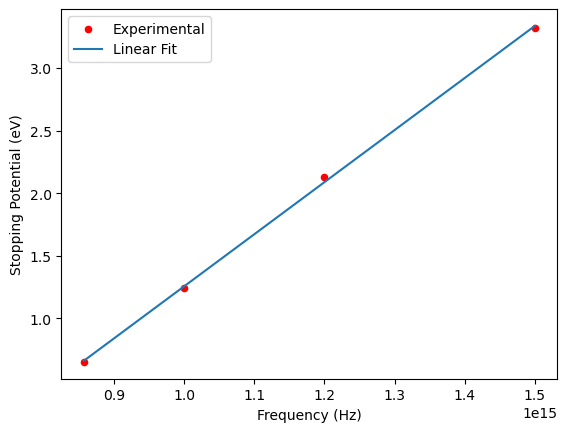

In [25]:
# You may reuse plotting or fitting utilities developed earlier,
# but ensure variable names are clear and physically meaningful.

results.plot.scatter(x = 'Frequency (Hz)', y = 'Stopping Potential (eV)', label = 'Experimental', color = 'r')

slope, intercept = np.polyfit(results['Frequency (Hz)'], results['Stopping Potential (eV)'], 1)

x_trendline = np.linspace(min(results['Frequency (Hz)']), max(results['Frequency (Hz)']), 200)
y_trendline = slope * x_trendline + intercept

plt.plot(x_trendline, y_trendline, label="Linear Fit")
plt.legend()
plt.show()

# Example conversion (use your fitted slope):
h_Js = slope * 1.602e-19
work = -intercept

### SHORT RESPONSE QUESTIONS

1. The proportionality constant relating energy and frequency obtained from your fit is a well-known physical constant. Identify this constant and describe its physical significance.

2. Compare your calculated value to the accepted value. What is the percent error?

3. What value do you obtain for the work function of your metal? How does it compare to the accepted value?

4. Discuss at least two sources of systematic or experimental error that could affect the slope or intercept of your fit.

### ANSWER

In [27]:
print(h_Js)
print(work)

6.663307780520421e-34
2.9024309691281904


<br/><br/>
<br/><br/>

# REFLECTION

`10 points`  

### FINAL REFLECTION

1. How did the use of `pandas` and user-defined functions enable reproducible and scalable data analysis in this experiment? Describe how similar computational workflows could support data analysis or modeling tasks you might encounter as a practicing chemist.

2. How do your experimental results from the photoelectric effect contradict predictions of the classical wave model of light? Cite specific features of your data (e.g., threshold behavior, linear trends) that support a particle-based description.

### ANSWERS

<br/><br/>
<br/><br/>